In [1]:
import numpy as np
import pandas as pd

import fs_qe as fq

# 1 data process

In [2]:
df, df2, df3, df4 = fq.dataprocess(file='data/us_toprevenue.csv', var1='logrevenue', var2='revenue', var3='revenue_mean')

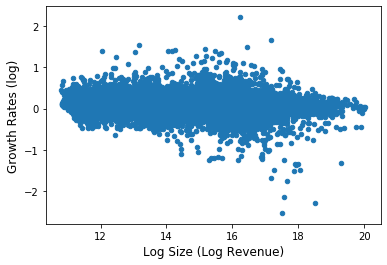

In [3]:
fq.scatterplot(df, x='logrevenue', xlabel='Log Size (Log Revenue)')

In [4]:
df5 = df2[df2['quantile_ex_1'] == pd.Interval(10.813, 13.119, closed='right') ]
df6 = df2[df2['quantile_ex_1'] == pd.Interval(13.119, 14.561, closed='right') ]
df7 = df2[df2['quantile_ex_1'] == pd.Interval(14.561, 15.843, closed='right') ]
df8 = df2[df2['quantile_ex_1'] == pd.Interval(15.843, 20.031, closed='right') ]

df5

,count,Unnamed: 0,year,id,revenue,logrevenue,fgrow_log,quantile_ex_1
0,1,29610,1955,460,49700.0,10.813760,0.457094,"(10.813, 13.119]"
1,2,29609,1955,459,50200.0,10.823770,0.103965,"(10.813, 13.119]"
2,3,29607,1955,457,50300.0,10.825760,0.126799,"(10.813, 13.119]"
3,4,29608,1955,458,50300.0,10.825760,0.581805,"(10.813, 13.119]"
4,5,29606,1955,456,50400.0,10.827746,0.392149,"(10.813, 13.119]"
...,...,...,...,...,...,...,...,...
7399,7400,20008,1975,333,498100.0,13.118556,0.046100,"(10.813, 13.119]"
7400,7401,18608,1978,385,498200.0,13.118757,0.215325,"(10.813, 13.119]"
7401,7402,19077,1977,370,498400.0,13.119158,0.181519,"(10.813, 13.119]"
7402,7403,20884,1973,262,498400.0,13.119158,0.089933,"(10.813, 13.119]"


In [5]:
draw1 = np.array(round(df5['fgrow_log'], ndigits=2))
draw2 = np.array(round(df6['fgrow_log'], ndigits=2))
draw3 = np.array(round(df7['fgrow_log'], ndigits=2))
draw4 = np.array(round(df8['fgrow_log'], ndigits=2))
draw1

array([0.46, 0.1 , 0.13, ..., 0.18, 0.09, 0.11])

# 2 bar graphs and PDFs

## 2.1 bar graphs for mean and standard deviation of firm growth 

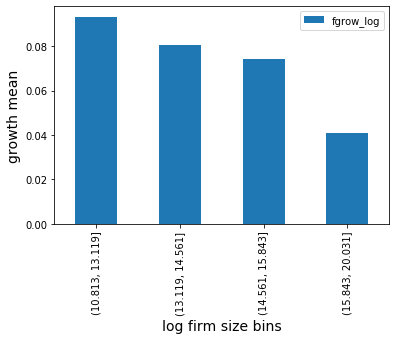

In [6]:
fq.plotbars(df3)

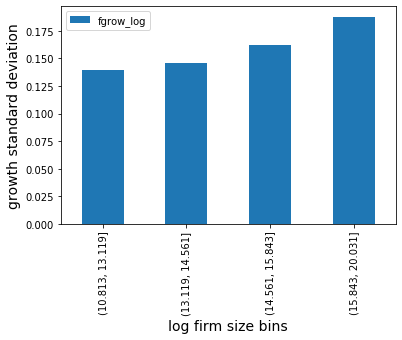

In [7]:
fq.plotbars(df4, xlabel='log firm size bins', ylabel='growth standard deviation')

## 2.2 PDFs for growth of firms in 4 bins above, respectively

The ``empirical func1`` shows the empirical PDF functions of firm growth for firms in **bin 1** above.

The ``empirical func2`` shows the empirical PDF functions of firm growth for firms in **bin 2** above.

The ``empirical func3`` shows the empirical PDF functions of firm growth for firms in **bin 3** above.

The ``empirical func4`` shows the empirical PDF functions of firm growth for firms in **bin 4** above.

In [8]:
d1 = fq.generating_pdf(draw1)
d2 = fq.generating_pdf(draw2)
d3 = fq.generating_pdf(draw3)
d4 = fq.generating_pdf(draw4)

In [9]:
x1 = d1['fgrow_mean']
x2 = d2['fgrow_mean']
x3 = d3['fgrow_mean']
x4 = d4['fgrow_mean']

y1 = d1['prob']
y2 = d2['prob']
y3 = d3['prob']
y4 = d4['prob']

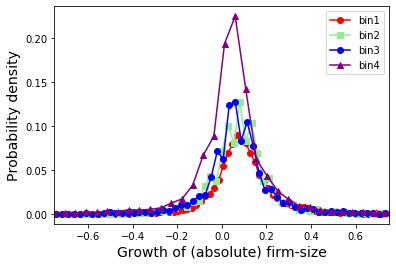

In [10]:
fq.density_plot(x1, x2, x3, x4, y1, y2, y3, y4)

# 3 tail index

In [11]:
s_dist1 = df.revenue
s_dist2 = df.logrevenue
s_dist3 = df.fgrow_log

The tail index for firm size distribution with firm size measured by revenue is

In [12]:
fq.gabaix_est(s_dist1, c=0.01)

2.6238192977616825

The tail index for log firm size distribution with firm size measured by revenue is

In [13]:
fq.gabaix_est(s_dist2, c=0.01)

50.01560010535996

The tail index for firm growth distribution with firm size measured by revenue is

In [14]:
fq.gabaix_est(s_dist3, c=0.01)

3.884940602325477

## 3.3 tail index for firm size distribution yearly from 1955 to 2018

In [15]:
n = 1955
N = 2018
while n <= N:
    x = df[df['year'] == n].revenue
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 1955 is 1.5077269322698712
Tail index in year 1956 is 1.7940909596890857
Tail index in year 1957 is 1.9450441789943935
Tail index in year 1958 is 2.1104244163040233
Tail index in year 1959 is 1.8565887499908933
Tail index in year 1960 is 1.9764744372017806
Tail index in year 1961 is 1.7106491787046765
Tail index in year 1962 is 2.0244362424564875
Tail index in year 1963 is 1.7370125000650232
Tail index in year 1964 is 1.6041687091063492
Tail index in year 1965 is 1.521359022176466
Tail index in year 1966 is 1.6093201712622505
Tail index in year 1967 is 1.8708394982513314
Tail index in year 1968 is 2.0856794113147386
Tail index in year 1969 is 1.9324770581770214
Tail index in year 1970 is 1.8190107619052247
Tail index in year 1971 is 2.0266687200066684
Tail index in year 1972 is 1.7426485187279863
Tail index in year 1973 is 1.6481327210397663
Tail index in year 1974 is 1.600487963864711
Tail index in year 1975 is 2.9763748869593063
Tail index in year 1976 is 2.6841510

## 3.4 tail index for log firm size distribution yearly from 1955 to 2018

In [16]:
n = 1955
N = 2018
while n <= N:
    x = df[df['year'] == n].logrevenue
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 1955 is 23.3163172889627
Tail index in year 1956 is 28.359899334150043
Tail index in year 1957 is 30.539464809338217
Tail index in year 1958 is 33.18692145136314
Tail index in year 1959 is 28.943031355275465
Tail index in year 1960 is 31.09508139139337
Tail index in year 1961 is 26.99552084739805
Tail index in year 1962 is 31.807793572736962
Tail index in year 1963 is 27.54602342810022
Tail index in year 1964 is 25.542852248526085
Tail index in year 1965 is 24.204899766999574
Tail index in year 1966 is 26.020660107547297
Tail index in year 1967 is 30.379808316179165
Tail index in year 1968 is 34.02133362159547
Tail index in year 1969 is 31.64457545807378
Tail index in year 1970 is 29.832483087589463
Tail index in year 1971 is 32.97637637774513
Tail index in year 1972 is 28.77867588916075
Tail index in year 1973 is 27.30092152858864
Tail index in year 1974 is 26.739175403169565
Tail index in year 1975 is 51.304332683757025
Tail index in year 1976 is 46.35805080415513


## 3.5 tail index for firm growth distribution yearly from 1955 to 2018

In [17]:
n = 1955
N = 2018
while n <= N:
    x = df[df['year'] == n].fgrow_log
    if len(x) == 0: 
        print('None in year', n)
    else:
        print('Tail index in year', n, 'is', fq.gabaix_est(x, c=0.01))
    n += 1

Tail index in year 1955 is 7.137935139656351
Tail index in year 1956 is 4.7564774460337755
Tail index in year 1957 is 7.415392029907403
Tail index in year 1958 is 5.37525996807285
Tail index in year 1959 is 61.300164527813976
Tail index in year 1960 is 3.0338849114554454
Tail index in year 1961 is 6.566707935202006
Tail index in year 1962 is 3.673603118125173
Tail index in year 1963 is 5.699035093756213
Tail index in year 1964 is 6.198675623607421
Tail index in year 1965 is 5.111635954331587
Tail index in year 1966 is 3.814336885072784
Tail index in year 1967 is 2.9798145728946315
Tail index in year 1968 is 2.8307629207077287
Tail index in year 1969 is 2.580722272495029
Tail index in year 1970 is 4.0417177135576
Tail index in year 1971 is 4.880813410418466
Tail index in year 1972 is 1.7549247478117764
Tail index in year 1973 is 1.5467602699831753
Tail index in year 1974 is 3.3964309182685586
Tail index in year 1975 is 1.8064763926013652
Tail index in year 1976 is 2.0610283333411905
Tai